In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np


In [11]:
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [25]:
from tensorflow.keras import optimizers


In [26]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [61]:
x_val = X[:15000]
partial_x_train = X[15000:]
y_val = y[:15000]
partial_y_train = y[15000:]

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(156,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(16, activation=tf.nn.relu),

    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])



In [70]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 156)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               20096     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 29,409
Trainable params: 29,409
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32,validation_data=(x_val, y_val))



Train on 24703 samples, validate on 15000 samples
Epoch 1/15
24703/24703 [==============================] - 4s 147us/sample - loss: 0.1218 - accuracy: 0.9661 - val_loss: 0.0660 - val_accuracy: 0.9862
Epoch 2/15
24703/24703 [==============================] - 3s 107us/sample - loss: 0.0646 - accuracy: 0.9877 - val_loss: 0.0543 - val_accuracy: 0.9908
Epoch 3/15
24703/24703 [==============================] - 3s 106us/sample - loss: 0.0568 - accuracy: 0.9900 - val_loss: 0.0591 - val_accuracy: 0.9907
Epoch 4/15
24703/24703 [==============================] - 3s 109us/sample - loss: 0.0561 - accuracy: 0.9903 - val_loss: 0.0516 - val_accuracy: 0.9908
Epoch 5/15
24703/24703 [==============================] - 3s 108us/sample - loss: 0.0543 - accuracy: 0.9903 - val_loss: 0.0559 - val_accuracy: 0.9905
Epoch 6/15
24703/24703 [==============================] - 3s 111us/sample - loss: 0.0553 - accuracy: 0.9900 - val_loss: 0.0535 - val_accuracy: 0.9907
Epoch 7/15
24703/24703 [==========================

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

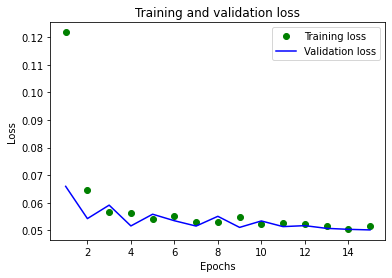

In [75]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

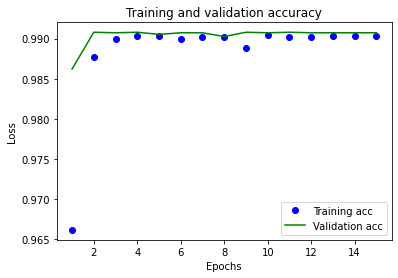

In [77]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

10587/10587 [==============================] - 1s 48us/sample - loss: 0.0549 - accuracy: 0.9904
Test accuracy: 0.99036556
